In [2]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Advertising Budget and Sales.csv")
data.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.isna().sum()

,0
Unnamed: 0,0
TV Ad Budget ($),0
Radio Ad Budget ($),0
Newspaper Ad Budget ($),0
Sales ($),0


In [4]:
data.dtypes

,0
Unnamed: 0,int64
TV Ad Budget ($),float64
Radio Ad Budget ($),float64
Newspaper Ad Budget ($),float64
Sales ($),float64


In [5]:
x=data[['TV Ad Budget ($)','Radio Ad Budget ($)','Newspaper Ad Budget ($)']]
y=data['Sales ($)']

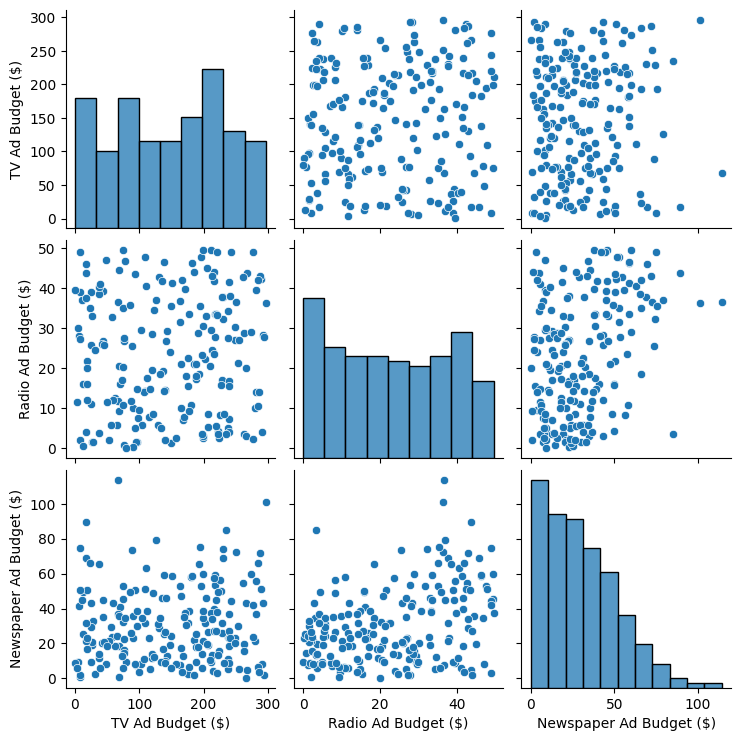

In [6]:
import seaborn as sns
sns.pairplot(x)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [32]:
from sklearn.linear_model import LinearRegression
model_1=LinearRegression()
model_1.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred_1=model_1.predict(x_test)
y_pred_1

array([15.61596823, 24.65783065, 18.31173865, 14.23483569, 13.63639165,
       12.28741698,  7.72747612, 15.28739037, 16.79241073, 18.89532884,
       24.02389608, 14.87052722, 11.46583443,  7.54018577,  7.61768301,
       12.62692187, 15.42640021, 17.69009684, 12.16761694, 21.14601482,
        9.06643929, 21.59476138,  8.06547438, 14.77300714, 11.92174843,
       10.08159334, 13.93200143, 13.74857222,  8.6436458 , 15.08977047,
       12.34772234, 11.67865646, 12.71188554,  7.77225398, 13.81823709,
        9.06217862, 15.4263939 ,  9.84369899, 20.65062787, 16.28271762,
       23.6804881 , 15.45233139, 10.42768305, 17.25191573,  6.04498537,
       20.67363751,  5.31146684, 17.20877129,  8.76040985,  3.65683181,
       12.69311524,  8.82187389, 15.21896172, 16.35138403,  4.40923947,
        9.96580771, 15.158835  ,  9.68027512, 16.97930192, 10.99046763])

In [36]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
mse_1=mean_squared_error(y_test,y_pred_1)
print(mse_1)
rmse_1=np.sqrt(mse_1)
print(rmse_1)
r2_1=r2_score(y_test,y_pred_1)
print(r2_1)

1.9801741215583324
1.4071865979884588
0.9225778395989302


In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
model_2=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
model_2.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [38]:
y_pred_2=model_2.predict(x_test)
y_pred_2

array([11.62785627, 27.1282127 , 19.64892002, 12.71762706, 11.74505774,
        9.71230874,  7.31648893, 13.30024135, 17.50295686, 19.13106311,
       25.33703922, 15.65749059, 11.45288852,  9.28322821,  9.29448238,
       11.92168242, 15.90290925, 18.53377161, 10.32633362, 23.29095563,
        9.97961707, 23.24348739,  9.1317603 , 13.17354976, 12.74165811,
       10.66220518, 12.44653171, 12.03859107,  6.25787532, 15.7005947 ,
       12.73243271,  9.89899386, 13.03476879,  9.1581653 , 14.27079538,
       10.25725483, 13.87174385, 10.28524846, 22.45900822, 16.73299018,
       25.04775142, 16.37373872,  8.58862181, 17.58390374,  7.00420776,
       22.61648227,  7.21262582, 18.24581174,  7.9021663 ,  5.64846198,
       13.51794569, 10.14392008, 14.82731499, 17.21588973,  6.24069978,
       10.96030855, 13.61521855, 10.51246154, 17.77762367, 11.99710441])

In [39]:
mse_2=mean_squared_error(y_test,y_pred_2)
print(mse_2)
rmse_2=np.sqrt(mse_2)
print(rmse_2)
r2_2=r2_score(y_test,y_pred_2)
print(r2_2)

0.2450052834506404
0.49498008389291825
0.9904206210211973


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
model_3=make_pipeline(StandardScaler(),SVR(kernel='rbf'))
model_3.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [42]:
y_pred_3=model_3.predict(x_test)
y_pred_3

array([12.5255944 , 21.89223099, 18.83911136, 13.48004825, 11.9133108 ,
       11.07042259,  9.52719487, 13.44353157, 17.64346797, 19.16921262,
       21.91581901, 15.78098372, 11.4463273 ,  9.52501196,  9.40215213,
       11.99768513, 15.99430982, 18.71099798, 11.48396873, 20.89479607,
       10.25011055, 21.77199391,  9.02703852, 13.08143973, 12.27975286,
       10.5731507 , 12.20499932, 12.14430787,  8.77792526, 15.56965704,
       12.24196865, 11.35547763, 13.42155899,  9.8657223 , 14.19375375,
        9.89922505, 14.55927175, 10.20097933, 21.16090448, 16.930412  ,
       21.44693217, 15.61484672, 10.74475274, 17.81175965,  8.07109677,
       21.18159059,  8.1077532 , 18.041993  ,  9.36828344,  9.05260187,
       13.32917771, 10.10014946, 15.06927755, 17.0408523 ,  8.12949399,
       10.67309273, 13.63048653, 10.21877328, 18.11591117, 11.88915548])

In [43]:
mse_3=mean_squared_error(y_test,y_pred_3)
print(mse_3)
rmse_3=np.sqrt(mse_3)
print(rmse_3)
r2_3=r2_score(y_test,y_pred_3)
print(r2_3)

2.077063721078884
1.4412021791125922
0.9187895858117471


Text(0.5, 1.0, 'Model Comparison')

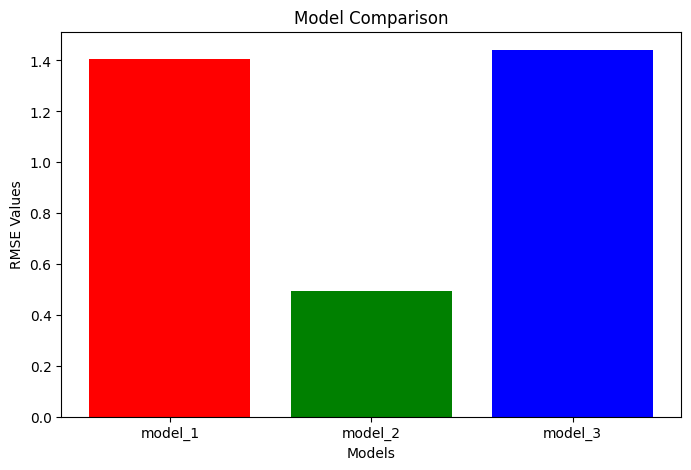

In [46]:
import matplotlib.pyplot as plt
model=['model_1','model_2','model_3']
rmse=[rmse_1,rmse_2,rmse_3]
plt.figure(figsize=(8,5))
plt.bar(model,rmse,color=['red','green','blue'])
plt.xlabel('Models')
plt.ylabel('RMSE Values')
plt.title("Model Comparison")

In [53]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(x_train)

KMeans(n_clusters=3, random_state=42)

In [54]:
labels=kmeans.labels_
labels

array([0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 1, 1,
       2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 2,
       1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 0,
       0, 2, 0, 2, 1, 0, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0,
       1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 2, 2,
       2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 1, 1, 2, 0, 1,
       0, 2, 0, 2, 2, 0, 0, 1], dtype=int32)

In [55]:
centroids=kmeans.cluster_centers_
centroids

array([[241.04107143,  24.93035714,  34.16428571],
       [ 41.6952381 ,  23.06190476,  29.12857143],
       [141.51666667,  21.37619048,  28.22619048]])

/tmp/ipython-input-63-1328334119.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Clusters')


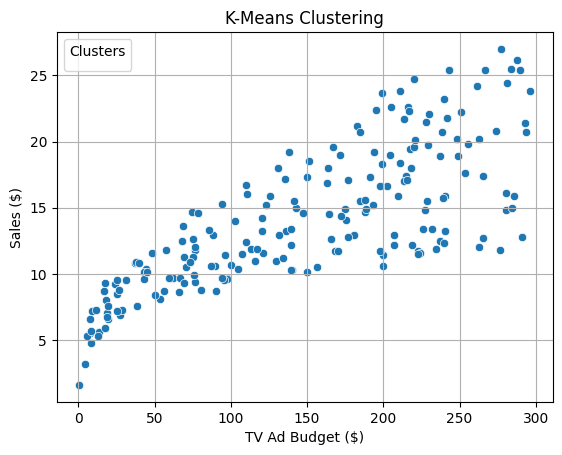

In [63]:
import seaborn as sns
sns.scatterplot(
    data=data,
    x='TV Ad Budget ($)',
    y='Sales ($)'
)
plt.title('K-Means Clustering')
plt.xlabel('TV Ad Budget ($)')
plt.ylabel('Sales ($)')
plt.legend(title='Clusters')
plt.grid(True)
plt.show();